In [1]:
#Importing all the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In this notebook, we'll try create a neural network that performs a very simple linear fit to some 2D data.

Below given is the "Graph of wX + b = z" :

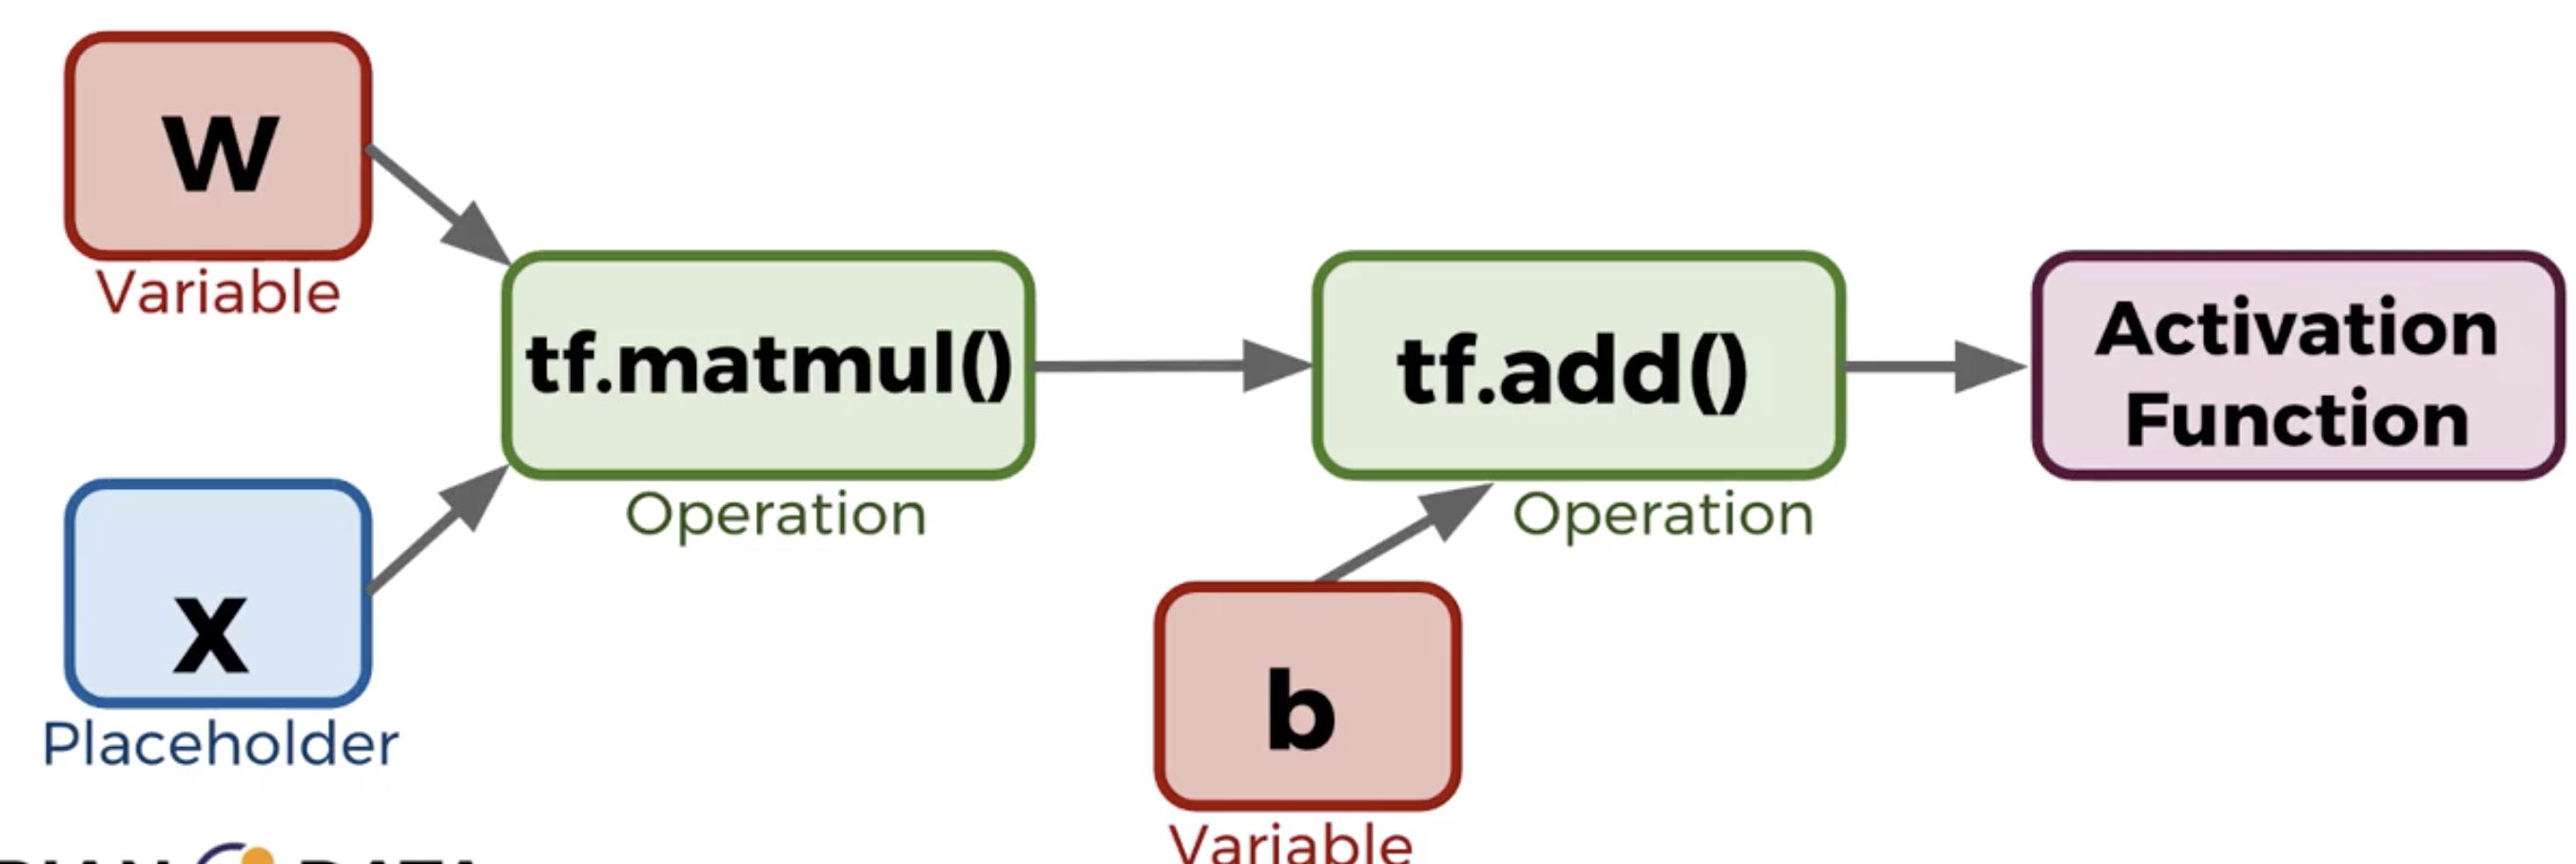

Once we build the above network, we'll also introduce some sort of optimization function that tunes 'w' and 'b'.

In [2]:
#Set seeds to ensure same results
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
#Building our random dummy data
rand_a = np.random.uniform(0, 100, size=(5, 5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [4]:
rand_b = np.random.uniform(0, 100, size=(5, 1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [5]:
n_features = 10
n_dense_neurons = 3

In [6]:
x = tf.placeholder(tf.float32, (None, n_features))

W = tf.Variable(initial_value=tf.random_uniform((n_features, n_dense_neurons)))
b = tf.Variable(initial_value=tf.ones((n_dense_neurons)))

In [7]:
xW = tf.matmul(x, W)
z = tf.add(xW, b)

a = tf.sigmoid(z)

In [8]:
init = tf.global_variables_initializer()

In [9]:
with tf.Session() as sess:
    sess.run(init)
    layer_outputs = sess.run(a, feed_dict={x:np.random.random((1, n_features))})

In [10]:
print(layer_outputs)

[[0.97186095 0.9830446  0.9802405 ]]


## Simple Regression example

In [11]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)   # Add some noise to our dummy input data

In [12]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [13]:
y_labels = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [14]:
y_labels

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

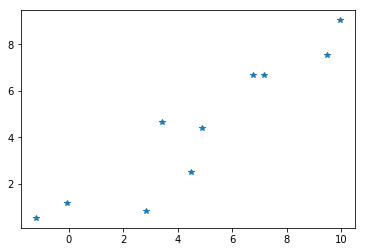

In [15]:
plt.plot(x_data, y_labels, '*')

y = mX + b

In [16]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [17]:
m = tf.Variable(initial_value=0.44)
b = tf.Variable(initial_value=0.87)

In [18]:
# Optimize using the cost function
error = 0 # Initial error

for x, y in zip(x_data, y_labels):
    y_hat = m * x + b
    
    error = (y - y_hat)**2   # Cost function

In [19]:
# Gradient descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)   # Tell the optimizer what it actually needs to minimize

In [20]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    
    iterations = 15
    for i in range(iterations):
        sess.run(train)

    final_slope, final_intercept = sess.run([m, b])

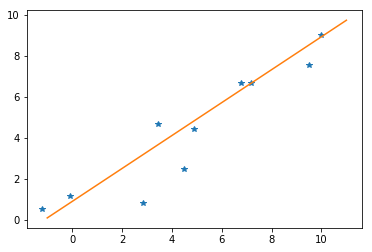

In [22]:
x_test = np.linspace(-1, 11, 10)
predictions = final_slope * x_test + final_intercept

plt.plot(x_data, y_labels, '*')
plt.plot(x_test, predictions)